<div align="center"><b><font size="6">CM50270</font></b></div>
<div align="center"><b><font size="6">Coursework 2: Group Project</font></b></div>
<div align="center"><b><font size="6">Lunar Lander Project</font></b></div>


# Update package lists, essential tools and SWIG

In [14]:
!apt-get update
!apt-get install -y build-essential swig

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,798 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,082 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,374 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu

In [15]:
!pip uninstall -y box2d-py
!pip install -U --no-cache-dir --force-reinstall box2d-py


Found existing installation: box2d-py 2.3.8
Uninstalling box2d-py-2.3.8:
  Successfully uninstalled box2d-py-2.3.8
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.5/374.5 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.8-cp310-cp310-linux_x86_64.whl size=2349139 sha256=6d62c4587d8afd8b94d2901fb5489560704cadf70062dd78e53c72822a00ca09
  Stored in directory: /tmp/pip-ephem-wheel-cache-6x3axllm/wheels/47/01/d2/6a780da77ccb98b1d2facdd520a8d10838a03b590f6f8d50c0
Successfully built box2d-py


<div><b><font size="6">Deep Q Network (DQN) </font></b></div>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

Episode: 0, Total reward: -158.88128383783442, Epsilon: 1.00, Learning_rate: 0.0001
Episode: 1, Total reward: -106.66854674440249, Epsilon: 0.99, Learning_rate: 0.0001
Episode: 2, Total reward: -184.98370432020837, Epsilon: 0.99, Learning_rate: 0.0001
Episode: 3, Total reward: -89.8318937873084, Epsilon: 0.98, Learning_rate: 0.0001
Episode: 4, Total reward: -82.47318708007448, Epsilon: 0.98, Learning_rate: 0.0001
Episode: 5, Total reward: -271.34337253274737, Epsilon: 0.98, Learning_rate: 0.0001
Episode: 6, Total reward: -128.84044651320457, Epsilon: 0.97, Learning_rate: 0.0001
Episode: 7, Total reward: -80.39395218539994, Epsilon: 0.97, Learning_rate: 0.0001
Episode: 8, Total reward: -103.97544933053912, Epsilon: 0.96, Learning_rate: 0.0001
Episode: 9, Total reward: -149.74552272208427, Epsilon: 0.96, Learning_rate: 0.0001
Episode: 10, Total reward: -62.476763596238754, Epsilon: 0.95, Learning_rate: 0.0001
Episode: 11, Total reward: -145.65869774525746, Epsilon: 0.95, Learning_rate: 0

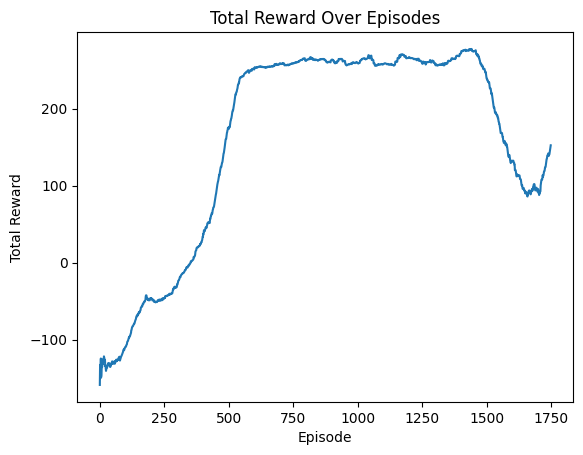

Episode 1: Total Reward: 262.1852896363756
Episode 2: Total Reward: 164.3364837475757
Episode 3: Total Reward: 255.99194229147474
Episode 4: Total Reward: 18.003324164711444
Episode 5: Total Reward: 295.84536981459155


In [9]:
import gym
import os
import time
import random
import csv
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque
import numpy as np
import matplotlib.pyplot as plt

model_dir = 'model'
os.makedirs(model_dir, exist_ok = True)

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")


RANDOM_SEED = 42

# Fix seed to compare performances among algorithms
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)


class ReplayBuffer:

    def __init__(self, max_cap):
        self.buffer = deque(maxlen = max_cap)

    def __len__(self):
        return len(self.buffer)

    def sample(self, batch_size):

        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = [], [], [], [], []

        for sample in batch:
            state, action, reward, next_state, done = sample
            states.append(state)
            actions.append(action)
            rewards.append(reward)
            next_states.append(next_state)
            dones.append(done)

        s = np.concatenate(states), np.array(actions), np.array(rewards), np.concatenate(next_states), np.array(dones)

        return s

    def push(self, state, action, reward, next_state, done):

          state = np.asarray(state, dtype = np.float32)
          state = state.reshape(1, -1)

          next_state = np.asarray(next_state, dtype = np.float32)
          next_state = next_state.reshape(1, -1)


          self.buffer.append(
              (state,
              action,
              reward,
              next_state,
              done)
              )


class DQN(nn.Module):

    def __init__(self, n_inputs, n_actions):

        super(DQN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(n_inputs, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, n_actions)
        )

    def forward(self, x):
        return self.layers(x)

def choose_action(state, epsilon, n_actions):

    model.eval()

    if random.random() < epsilon:
        return random.randrange(n_actions)

    else:
        with torch.no_grad():
            state = torch.FloatTensor(np.expand_dims(state, axis = 0)).to(device)
            q_val = model(state)
            q = q_val.max(1)[1].item()

            return q

    model.train()

# Simulate agent after finishing training
def simulate_agent(env, model, n_episodes = 5):

    for i in range(n_episodes):
        state = env.reset()
        episode_reward = 0

        while True:
            if random.random() < 0:
                action = random.randrange(n_actions)
            else:
                with torch.no_grad():
                    state_tensor = torch.FloatTensor(np.expand_dims(state, axis=0)).to(device)
                    action = model(state_tensor).argmax().item()
            state, reward, done, _ = env.step(action)
            state = np.array([state]) if not isinstance(state, np.ndarray) else state
            episode_reward += reward

            if done:
                break

        print(f"Episode {i+1}: Total Reward: {episode_reward}")

def compute_loss(batch_size):

    state, action, reward, next_state, done = replay_buffer.sample(batch_size)
    state = torch.FloatTensor(state).to(device)
    action = torch.LongTensor(action).unsqueeze(-1).to(device)
    reward = torch.FloatTensor(reward).to(device)
    done = torch.FloatTensor(done).to(device)

    next_state = torch.FloatTensor(next_state).to(device)

    q_values = model(state)
    next_q_values = target_model(next_state)
    next_q_state_values = target_model(next_state).max(1)[0].detach()

    expected_q_value = reward + gamma * next_q_state_values * (1 - done)
    q_value = q_values.gather(1, action).squeeze(-1)
    loss = nn.functional.smooth_l1_loss(q_value, expected_q_value)

    return loss


def plot_rewards(episode_rewards):
    plt.plot(episode_rewards)
    plt.title('Total Reward Over Episodes')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.show()

batch_size = 128
gamma = 0.99
replay_buffer_size = 200000
learning_rate = 0.0001
num_episodes = 1750
target_update = 4

epsilon_start = 1.0
epsilon_final = 0.01
epsilon_decay = 200000

eps_diff = epsilon_start - epsilon_final
epsilon_by_frame = lambda frame_idx: epsilon_final + eps_diff * np.exp(-1. * frame_idx / epsilon_decay)

env = gym.make('LunarLander-v2')
env.seed(RANDOM_SEED)

n_inputs = env.observation_space.shape[0]
n_actions = env.action_space.n

model = DQN(n_inputs, n_actions).to(device)
target_model = DQN(n_inputs, n_actions).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

replay_buffer = ReplayBuffer(replay_buffer_size)
target_model.load_state_dict(model.state_dict())

episode_rewards = []
avg_rewards = []
start_time = time.time()
rolling_window = 100
threshold_reached = False

for i in range(num_episodes):

    state = env.reset()
    episode_reward = 0

    for step in range(1000):

        epsilon = epsilon_by_frame(i * 1000 + step)
        action = choose_action(state, epsilon, n_actions)

        next_state, reward, done, _ = env.step(action)

        if isinstance(next_state, np.ndarray):
          next_state = next_state
        else:
          next_state = np.array([next_state])

        replay_buffer.push(state, action, reward, next_state, done)

        state = next_state
        episode_reward += reward

        if len(replay_buffer) > batch_size:

            loss = compute_loss(batch_size)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if done:
            break

    episode_rewards.append(episode_reward)

# Average reward based 99 episodes before and the current epsiode
    if i >= rolling_window:
        sum_reward = sum(episode_rewards[i - rolling_window : i])
        avg_reward = sum_reward / rolling_window
    else:
        sum_reward = sum(episode_rewards[:i + 1])
        avg_reward = sum_reward / (i + 1)

    avg_rewards.append(avg_reward)
# Check how long an agent can reach avg reward 200
    if avg_reward >= 200 and threshold_reached is False:
        threshold_reached = True
        print("200 avg. reward reached at episode {} in {:.2f} sec".format(i, time.time() - start_time))

    if i % target_update == 0:
        target_model.load_state_dict(model.state_dict())

    current_lr = optimizer.param_groups[0]['lr']

    print('Episode: {}, Total reward: {}, Epsilon: {:.2f}, Learning_rate: {}'.format(i, episode_reward, epsilon, current_lr))

plot_rewards(avg_rewards)

env = gym.make('LunarLander-v2', render_mode="human")
simulate_agent(env, model)
env.close()

<div><b><font size="6">Deep Q Network with Prioritized Experience Replay (DQN with PER
) </font></b></div>
Ref : https://github.com/rlcode/per/blob/master/SumTree.py (Sumtree and PER parts)

Episode: 0, Total reward: -158.88128383783442, Epsilon: 1.00, Learning_rate: 0.0001
Episode: 1, Total reward: -239.38890776072492, Epsilon: 0.99, Learning_rate: 0.0001
Episode: 2, Total reward: -24.92677224114584, Epsilon: 0.99, Learning_rate: 0.0001
Episode: 3, Total reward: 4.548890234653726, Epsilon: 0.98, Learning_rate: 0.0001
Episode: 4, Total reward: -133.5539468596083, Epsilon: 0.98, Learning_rate: 0.0001
Episode: 5, Total reward: -79.97481249231198, Epsilon: 0.98, Learning_rate: 0.0001
Episode: 6, Total reward: -127.90102098023837, Epsilon: 0.97, Learning_rate: 0.0001
Episode: 7, Total reward: -93.19112050475762, Epsilon: 0.97, Learning_rate: 0.0001
Episode: 8, Total reward: -170.04525627544496, Epsilon: 0.96, Learning_rate: 0.0001
Episode: 9, Total reward: -140.4102579284371, Epsilon: 0.96, Learning_rate: 0.0001
Episode: 10, Total reward: -87.05060432141664, Epsilon: 0.95, Learning_rate: 0.0001
Episode: 11, Total reward: -237.7193679842032, Epsilon: 0.95, Learning_rate: 0.0001

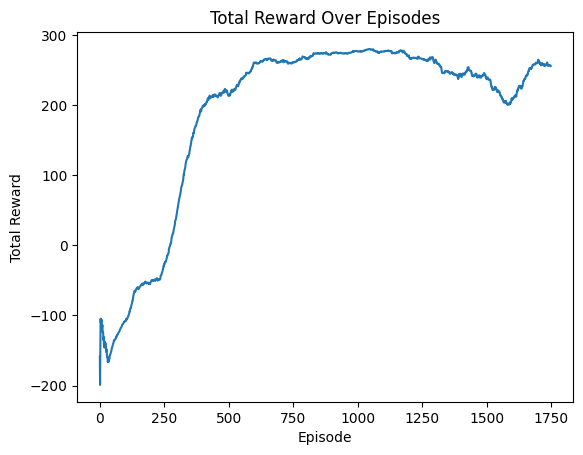

Episode 1: Total Reward: 275.455163181908
Episode 2: Total Reward: 288.9892716091663
Episode 3: Total Reward: 276.7777615017677
Episode 4: Total Reward: 285.9497785141315
Episode 5: Total Reward: 281.31387717449934


In [10]:
import os
import time
import random
import csv
from collections import deque

import gym
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
RANDOM_SEED = 42

random.seed(RANDOM_SEED)

np.random.seed(RANDOM_SEED)

torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)

model_dir = 'model'
os.makedirs(model_dir, exist_ok=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SumTree:
    def __init__(self, capacity):
        self.capacity = capacity
        self.tree = np.zeros(2 * capacity - 1)
        self.data = np.zeros(capacity, dtype=object)
        self.data_pointer = 0

    def add(self, priority, data):
        tree_index = self.data_pointer + self.capacity - 1
        self.data[self.data_pointer] = data
        self.update(tree_index, priority)
        self.data_pointer += 1
        if self.data_pointer >= self.capacity:
            self.data_pointer = 0

    def update(self, tree_index, priority):
        change = priority - self.tree[tree_index]
        self.tree[tree_index] = priority
        while tree_index != 0:
            tree_index = (tree_index - 1) // 2
            self.tree[tree_index] += change

    def get_leaf(self, value):
        parent_index = 0
        while True:
            left_child_index = 2 * parent_index + 1
            right_child_index = left_child_index + 1
            if left_child_index >= len(self.tree):
                leaf_index = parent_index
                break
            else:
                if value <= self.tree[left_child_index]:
                    parent_index = left_child_index
                else:
                    value -= self.tree[left_child_index]
                    parent_index = right_child_index
        data_index = leaf_index - self.capacity + 1
        return leaf_index, self.tree[leaf_index], self.data[data_index]


class PrioritizedReplayBuffer:
    def __init__(self, capacity, alpha=0.8):
        self.alpha = alpha
        self.capacity = capacity
        self.tree = SumTree(capacity)
        self.max_priority = 1.0

    def push(self, state, action, reward, next_state, done):
        state = np.expand_dims(state, 0)
        next_state = np.expand_dims(next_state, 0)
        max_priority = np.max(self.tree.tree[-self.tree.capacity:])
        if max_priority == 0:
            max_priority = self.max_priority
        self.tree.add(max_priority, (state, action, reward, next_state, done))

    def sample(self, batch_size, beta):
        batch = []
        indices = np.empty(batch_size, dtype=int)
        priorities = np.empty(batch_size, dtype=float)
        segment = self.tree.tree[0] / batch_size
        priorities_sum = self.tree.tree[0]
        for i in range(batch_size):
            a = segment * i
            b = segment * (i + 1)
            value = np.random.uniform(a, b)
            index, priority, data = self.tree.get_leaf(value)
            batch.append(data)
            indices[i] = index
            priorities[i] = priority
        sample_probs = priorities / priorities_sum
        weights = (self.capacity * sample_probs) ** (-beta)
        weights /= weights.max()
        states, actions, rewards, next_states, dones = zip(*batch)
        return np.concatenate(states), np.array(actions), np.array(rewards), np.concatenate(next_states), np.array(dones), indices, weights

    def update_priorities(self, indices, errors, offset=0.1):
        for idx, error in zip(indices, errors):
            priority = (abs(error) + offset) ** self.alpha
            self.tree.update(idx, priority)

    def __len__(self):
        return len(self.tree.data)


class DQN(nn.Module):
    def __init__(self, num_inputs, num_actions):
        super(DQN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(num_inputs, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, num_actions)
        )

    def forward(self, x):
        return self.layers(x)

def choose_action(state, epsilon, num_actions):
    if random.random() < epsilon:
        return random.randrange(num_actions)
    else:
        with torch.no_grad():
            state = torch.FloatTensor(np.expand_dims(state, axis=0)).to(device)
            q_values = model(state)
            return q_values.max(1)[1].item()

def compute_loss(batch_size, beta=0.5):

    state, action, reward, next_state, done, indices, weights = replay_buffer.sample(batch_size, beta=beta)

    state = torch.FloatTensor(state).to(device)
    next_state = torch.FloatTensor(next_state).to(device)
    action = torch.LongTensor(action).unsqueeze(-1).to(device)
    reward = torch.FloatTensor(reward).to(device)
    done = torch.FloatTensor(done).to(device)
    weights = torch.FloatTensor(weights).to(device)

    q_value = model(state).gather(1, action).squeeze(-1)


    next_q_values_target = target_model(next_state).max(1)[0].detach()


    expected_q_value = reward + gamma * next_q_values_target * (1 - done)


    loss = nn.functional.smooth_l1_loss(q_value, expected_q_value, reduction='none')
    loss = (loss * weights).mean()


    prios = loss.detach().cpu().numpy() + 1e-5
    prios = np.full(len(indices), prios)
    replay_buffer.update_priorities(indices, prios)
    return loss


def simulate_agent(env, model, n_episodes = 5):

    for i in range(n_episodes):
        state = env.reset()
        episode_reward = 0

        while True:
            if random.random() < 0:
                action = random.randrange(n_actions)
            else:
                with torch.no_grad():
                    state_tensor = torch.FloatTensor(np.expand_dims(state, axis=0)).to(device)
                    action = model(state_tensor).argmax().item()
            state, reward, done, _ = env.step(action)
            state = np.array([state]) if not isinstance(state, np.ndarray) else state
            episode_reward += reward

            if done:
                break

        print(f"Episode {i+1}: Total Reward: {episode_reward}")


def plot_rewards(episode_rewards):
    plt.plot(episode_rewards)
    plt.title('Total Reward Over Episodes')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.show()

batch_size = 128
gamma = 0.99
replay_buffer_size = 200000
learning_rate = 0.0001
num_episodes = 1750
target_update = 4

epsilon_start = 1.0
epsilon_final = 0.01
epsilon_decay = 200000

eps_diff = epsilon_start - epsilon_final
epsilon_by_frame = lambda frame_idx: epsilon_final + eps_diff * np.exp(-1. * frame_idx / epsilon_decay)

env = gym.make('LunarLander-v2')
env.seed(RANDOM_SEED)

n_inputs = env.observation_space.shape[0]
n_actions = env.action_space.n

model = DQN(n_inputs, n_actions).to(device)
target_model = DQN(n_inputs, n_actions).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

replay_buffer = PrioritizedReplayBuffer(replay_buffer_size)
target_model.load_state_dict(model.state_dict())

episode_rewards = []
avg_rewards = []
start_time = time.time()
rolling_window = 100
threshold_reached = False

for i in range(num_episodes):

    state = env.reset()
    episode_reward = 0

    for step in range(1000):

        epsilon = epsilon_by_frame(i * 1000 + step)
        action = choose_action(state, epsilon, n_actions)

        next_state, reward, done, _ = env.step(action)

        if isinstance(next_state, np.ndarray):
          next_state = next_state
        else:
          next_state = np.array([next_state])

        replay_buffer.push(state, action, reward, next_state, done)

        state = next_state
        episode_reward += reward

        if len(replay_buffer) > batch_size:

            loss = compute_loss(batch_size)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if done:
            break

    episode_rewards.append(episode_reward)

    if i >= rolling_window:
        sum_reward = sum(episode_rewards[i - rolling_window : i])
        avg_reward = sum_reward / rolling_window
    else:
        sum_reward = sum(episode_rewards[:i + 1])
        avg_reward = sum_reward / (i + 1)

    avg_rewards.append(avg_reward)

    if avg_reward >= 200 and threshold_reached is False:
        threshold_reached = True
        print("200 avg. reward reached at episode {} in {:.2f} sec".format(i, time.time() - start_time))

    if i % target_update == 0:
        target_model.load_state_dict(model.state_dict())

    current_lr = optimizer.param_groups[0]['lr']

    print('Episode: {}, Total reward: {}, Epsilon: {:.2f}, Learning_rate: {}'.format(i, episode_reward, epsilon, current_lr))

plot_rewards(avg_rewards)

env = gym.make('LunarLander-v2', render_mode="human")
simulate_agent(env, model)
env.close()

<div><b><font size="6">Double Deep Q Network with Prioritized Experience Replay(DDQN with PER
) </font></b></div>

Episode: 0, Total reward: -158.88128383783442, Epsilon: 1.00, Learning_rate: 0.0001
Episode: 1, Total reward: -239.38890776072492, Epsilon: 0.99, Learning_rate: 0.0001
Episode: 2, Total reward: -24.92677224114584, Epsilon: 0.99, Learning_rate: 0.0001
Episode: 3, Total reward: 4.548890234653726, Epsilon: 0.98, Learning_rate: 0.0001
Episode: 4, Total reward: -133.5539468596083, Epsilon: 0.98, Learning_rate: 0.0001
Episode: 5, Total reward: -79.97481249231198, Epsilon: 0.98, Learning_rate: 0.0001
Episode: 6, Total reward: -127.90102098023837, Epsilon: 0.97, Learning_rate: 0.0001
Episode: 7, Total reward: -93.19112050475762, Epsilon: 0.97, Learning_rate: 0.0001
Episode: 8, Total reward: -170.04525627544496, Epsilon: 0.96, Learning_rate: 0.0001
Episode: 9, Total reward: -140.4102579284371, Epsilon: 0.96, Learning_rate: 0.0001
Episode: 10, Total reward: -87.05060432141664, Epsilon: 0.95, Learning_rate: 0.0001
Episode: 11, Total reward: -237.7193679842032, Epsilon: 0.95, Learning_rate: 0.0001

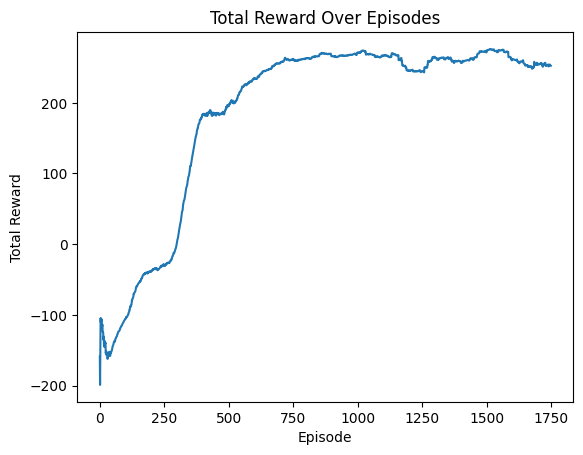

Episode 1: Total Reward: 110.52298946093967
Episode 2: Total Reward: 247.93187690866154
Episode 3: Total Reward: 303.99966230456346
Episode 4: Total Reward: 307.04776194792555
Episode 5: Total Reward: 300.1683183281598


In [11]:
import os
import time
import random
import csv
from collections import deque

import gym
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
RANDOM_SEED = 42


random.seed(RANDOM_SEED)


np.random.seed(RANDOM_SEED)

torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)

model_dir = 'model'
os.makedirs(model_dir, exist_ok=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SumTree:
    def __init__(self, capacity):
        self.capacity = capacity
        self.tree = np.zeros(2 * capacity - 1)
        self.data = np.zeros(capacity, dtype=object)
        self.data_pointer = 0

    def add(self, priority, data):
        tree_index = self.data_pointer + self.capacity - 1
        self.data[self.data_pointer] = data
        self.update(tree_index, priority)
        self.data_pointer += 1
        if self.data_pointer >= self.capacity:
            self.data_pointer = 0

    def update(self, tree_index, priority):
        change = priority - self.tree[tree_index]
        self.tree[tree_index] = priority
        while tree_index != 0:
            tree_index = (tree_index - 1) // 2
            self.tree[tree_index] += change

    def get_leaf(self, value):
        parent_index = 0
        while True:
            left_child_index = 2 * parent_index + 1
            right_child_index = left_child_index + 1
            if left_child_index >= len(self.tree):
                leaf_index = parent_index
                break
            else:
                if value <= self.tree[left_child_index]:
                    parent_index = left_child_index
                else:
                    value -= self.tree[left_child_index]
                    parent_index = right_child_index
        data_index = leaf_index - self.capacity + 1
        return leaf_index, self.tree[leaf_index], self.data[data_index]


class PrioritizedReplayBuffer:
    def __init__(self, capacity, alpha=0.8):
        self.alpha = alpha  # controls the amount of prioritization used
        self.capacity = capacity
        self.tree = SumTree(capacity)
        self.max_priority = 1.0

    def push(self, state, action, reward, next_state, done):
        state = np.expand_dims(state, 0)  # Ensure state is correctly shaped as (1, num_features)
        next_state = np.expand_dims(next_state, 0)  # Same for next_state
        max_priority = np.max(self.tree.tree[-self.tree.capacity:])
        if max_priority == 0:
            max_priority = self.max_priority
        self.tree.add(max_priority, (state, action, reward, next_state, done))

    def sample(self, batch_size, beta):
        batch = []
        indices = np.empty(batch_size, dtype=int)
        priorities = np.empty(batch_size, dtype=float)
        segment = self.tree.tree[0] / batch_size
        priorities_sum = self.tree.tree[0]
        for i in range(batch_size):
            a = segment * i
            b = segment * (i + 1)
            value = np.random.uniform(a, b)
            index, priority, data = self.tree.get_leaf(value)
            batch.append(data)
            indices[i] = index
            priorities[i] = priority
        sample_probs = priorities / priorities_sum
        weights = (self.capacity * sample_probs) ** (-beta)
        weights /= weights.max()
        states, actions, rewards, next_states, dones = zip(*batch)
        return np.concatenate(states), np.array(actions), np.array(rewards), np.concatenate(next_states), np.array(dones), indices, weights

    def update_priorities(self, indices, errors, offset=0.1):
        for idx, error in zip(indices, errors):
            priority = (abs(error) + offset) ** self.alpha
            self.tree.update(idx, priority)

    def __len__(self):
        return len(self.tree.data)


class DDQN(nn.Module):
    def __init__(self, num_inputs, num_actions):
        super(DDQN, self).__init__()
        self.fc1 = nn.Linear(num_inputs, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, num_actions)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def choose_action(state, epsilon, num_actions):
    if random.random() < epsilon:
        return random.randrange(num_actions)
    else:
        with torch.no_grad():
            state = torch.FloatTensor(np.expand_dims(state, axis=0)).to(device)
            q_values = model(state)
            return q_values.max(1)[1].item()

def compute_loss(batch_size, beta=0.5):
    state, action, reward, next_state, done, indices, weights = replay_buffer.sample(batch_size, beta=beta)

    state = torch.FloatTensor(state).to(device)
    next_state = torch.FloatTensor(next_state).to(device)
    action = torch.LongTensor(action).unsqueeze(-1).to(device)
    reward = torch.FloatTensor(reward).to(device)
    done = torch.FloatTensor(done).to(device)
    weights = torch.FloatTensor(weights).to(device)

    q_value = model(state).gather(1, action).squeeze(-1)

    next_action = model(next_state).max(1)[1].unsqueeze(-1)

    next_q_values_target = target_model(next_state).gather(1, next_action).squeeze(-1).detach()

    expected_q_value = reward + gamma * next_q_values_target * (1 - done)


    loss = nn.functional.smooth_l1_loss(q_value, expected_q_value, reduction='none')
    loss = (loss * weights).mean()


    prios = loss.detach().item() + 1e-5
    prios = np.full(len(indices), prios)
    replay_buffer.update_priorities(indices, prios)
    return loss


def simulate_agent(env, model, n_episodes = 5):

    for i in range(n_episodes):
        state = env.reset()
        episode_reward = 0

        while True:
            if random.random() < 0:
                action = random.randrange(n_actions)
            else:
                with torch.no_grad():
                    state_tensor = torch.FloatTensor(np.expand_dims(state, axis=0)).to(device)
                    action = model(state_tensor).argmax().item()
            state, reward, done, _ = env.step(action)
            state = np.array([state]) if not isinstance(state, np.ndarray) else state
            episode_reward += reward

            if done:
                break

        print(f"Episode {i+1}: Total Reward: {episode_reward}")

# Plotting the total rewards
def plot_rewards(episode_rewards):
    plt.plot(episode_rewards)
    plt.title('Total Reward Over Episodes')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.show()

batch_size = 128
gamma = 0.99
replay_buffer_size = 200000
learning_rate = 0.0001
num_episodes = 1750
target_update = 4

epsilon_start = 1.0
epsilon_final = 0.01
epsilon_decay = 200000

eps_diff = epsilon_start - epsilon_final
epsilon_by_frame = lambda frame_idx: epsilon_final + eps_diff * np.exp(-1. * frame_idx / epsilon_decay)

env = gym.make('LunarLander-v2')
env.seed(RANDOM_SEED)

n_inputs = env.observation_space.shape[0]
n_actions = env.action_space.n

model = DDQN(n_inputs, n_actions).to(device)
target_model = DDQN(n_inputs, n_actions).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

replay_buffer = PrioritizedReplayBuffer(replay_buffer_size)
target_model.load_state_dict(model.state_dict())

episode_rewards = []
avg_rewards = []
start_time = time.time()
rolling_window = 100
threshold_reached = False

for i in range(num_episodes):

    state = env.reset()
    episode_reward = 0

    for step in range(1000):

        epsilon = epsilon_by_frame(i * 1000 + step)
        action = choose_action(state, epsilon, n_actions)

        next_state, reward, done, _ = env.step(action)

        if isinstance(next_state, np.ndarray):
          next_state = next_state
        else:
          next_state = np.array([next_state])

        replay_buffer.push(state, action, reward, next_state, done)

        state = next_state
        episode_reward += reward

        if len(replay_buffer) > batch_size:

            loss = compute_loss(batch_size)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if done:
            break

    episode_rewards.append(episode_reward)

    if i >= rolling_window:
        sum_reward = sum(episode_rewards[i - rolling_window : i])
        avg_reward = sum_reward / rolling_window
    else:
        sum_reward = sum(episode_rewards[:i + 1])
        avg_reward = sum_reward / (i + 1)

    avg_rewards.append(avg_reward)

    if avg_reward >= 200 and threshold_reached is False:
        threshold_reached = True
        print("200 avg. reward reached at episode {} in {:.2f} sec".format(i, time.time() - start_time))

    if i % target_update == 0:
        target_model.load_state_dict(model.state_dict())

    current_lr = optimizer.param_groups[0]['lr']

    print('Episode: {}, Total reward: {}, Epsilon: {:.2f}, Learning_rate: {}'.format(i, episode_reward, epsilon, current_lr))

plot_rewards(avg_rewards)

env = gym.make('LunarLander-v2', render_mode="human")
simulate_agent(env, model)

<div><b><font size="6">Dueling Deep Q Network with Prioritized Experience Replay(Dueling DQN with PER
) </font></b></div>

Episode: 0, Total reward: -158.88128383783442, Epsilon: 1.00, Learning_rate: 0.0001
Episode: 1, Total reward: -239.38890776072492, Epsilon: 0.99, Learning_rate: 0.0001
Episode: 2, Total reward: -24.92677224114584, Epsilon: 0.99, Learning_rate: 0.0001
Episode: 3, Total reward: 4.548890234653726, Epsilon: 0.98, Learning_rate: 0.0001
Episode: 4, Total reward: -133.5539468596083, Epsilon: 0.98, Learning_rate: 0.0001
Episode: 5, Total reward: -79.97481249231198, Epsilon: 0.98, Learning_rate: 0.0001
Episode: 6, Total reward: -127.90102098023837, Epsilon: 0.97, Learning_rate: 0.0001
Episode: 7, Total reward: -93.19112050475762, Epsilon: 0.97, Learning_rate: 0.0001
Episode: 8, Total reward: -150.31664534646268, Epsilon: 0.96, Learning_rate: 0.0001
Episode: 9, Total reward: -112.72316017814313, Epsilon: 0.96, Learning_rate: 0.0001
Episode: 10, Total reward: -97.06844046591642, Epsilon: 0.95, Learning_rate: 0.0001
Episode: 11, Total reward: -49.00637010105058, Epsilon: 0.95, Learning_rate: 0.000

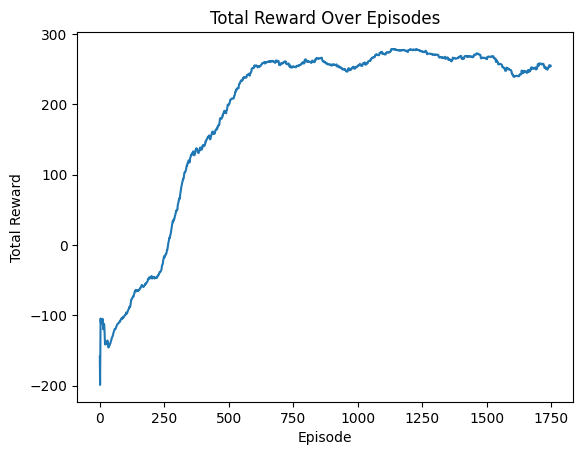

Episode 1: Total Reward: 261.87954217672745
Episode 2: Total Reward: 270.35437180922486
Episode 3: Total Reward: 310.54831613457736
Episode 4: Total Reward: 292.73979998284625
Episode 5: Total Reward: 303.35049182423126


In [12]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import csv

model_dir = 'model'
os.makedirs(model_dir, exist_ok=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
RANDOM_SEED = 42

random.seed(RANDOM_SEED)

np.random.seed(RANDOM_SEED)

torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)


class SumTree:
    def __init__(self, capacity):
        self.capacity = capacity
        self.tree = np.zeros(2 * capacity - 1)
        self.data = np.zeros(capacity, dtype=object)
        self.data_pointer = 0

    def add(self, priority, data):
        tree_index = self.data_pointer + self.capacity - 1
        self.data[self.data_pointer] = data
        self.update(tree_index, priority)
        self.data_pointer += 1
        if self.data_pointer >= self.capacity:
            self.data_pointer = 0

    def update(self, tree_index, priority):
        change = priority - self.tree[tree_index]
        self.tree[tree_index] = priority
        while tree_index != 0:
            tree_index = (tree_index - 1) // 2
            self.tree[tree_index] += change

    def get_leaf(self, value):
        parent_index = 0
        while True:
            left_child_index = 2 * parent_index + 1
            right_child_index = left_child_index + 1
            if left_child_index >= len(self.tree):
                leaf_index = parent_index
                break
            else:
                if value <= self.tree[left_child_index]:
                    parent_index = left_child_index
                else:
                    value -= self.tree[left_child_index]
                    parent_index = right_child_index
        data_index = leaf_index - self.capacity + 1
        return leaf_index, self.tree[leaf_index], self.data[data_index]

class PrioritizedReplayBuffer:
    def __init__(self, capacity, alpha=0.8):
        self.alpha = alpha
        self.capacity = capacity
        self.tree = SumTree(capacity)
        self.max_priority = 1.0

    def push(self, state, action, reward, next_state, done):
        state = np.expand_dims(state, 0)
        next_state = np.expand_dims(next_state, 0)
        max_priority = np.max(self.tree.tree[-self.tree.capacity:])
        if max_priority == 0:
            max_priority = self.max_priority
        self.tree.add(max_priority, (state, action, reward, next_state, done))

    def sample(self, batch_size, beta):
        batch = []
        indices = np.empty(batch_size, dtype=int)
        priorities = np.empty(batch_size, dtype=float)
        segment = self.tree.tree[0] / batch_size
        priorities_sum = self.tree.tree[0]
        for i in range(batch_size):
            a = segment * i
            b = segment * (i + 1)
            value = np.random.uniform(a, b)
            index, priority, data = self.tree.get_leaf(value)
            batch.append(data)
            indices[i] = index
            priorities[i] = priority
        sample_probs = priorities / priorities_sum
        weights = (self.capacity * sample_probs) ** (-beta)
        weights /= weights.max()
        states, actions, rewards, next_states, dones = zip(*batch)
        return np.concatenate(states), np.array(actions), np.array(rewards), np.concatenate(next_states), np.array(dones), indices, weights

    def update_priorities(self, indices, errors, offset=0.1):
        for idx, error in zip(indices, errors):
            priority = (abs(error) + offset) ** self.alpha
            self.tree.update(idx, priority)

    def __len__(self):
        return len(self.tree.data)

class DuelingDQN(nn.Module):
    def __init__(self, num_inputs, num_actions):
        super(DuelingDQN, self).__init__()
        self.feature = nn.Sequential(
            nn.Linear(num_inputs, 256),
            nn.ReLU(),
        )

        self.value_stream = nn.Sequential(
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 1)
        )

        self.advantage_stream = nn.Sequential(
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, num_actions)
        )

    def forward(self, x):
        features = self.feature(x)
        value = self.value_stream(features)
        advantages = self.advantage_stream(features)


        q_values = value + (advantages - advantages.mean(dim=1, keepdim=True))
        return q_values

def choose_action(state, epsilon, num_actions):
    if random.random() < epsilon:
        return random.randrange(num_actions)
    else:
        with torch.no_grad():
            # Convert state to torch tensor, ensure it is a sequence (array)
            state = torch.FloatTensor(np.expand_dims(state, axis=0)).to(device)
            q_values = model(state)
            return q_values.max(1)[1].item()

def compute_loss(batch_size, beta=0.5):
    state, action, reward, next_state, done, indices, weights = replay_buffer.sample(batch_size, beta=beta)

    state = torch.FloatTensor(state).to(device)
    next_state = torch.FloatTensor(next_state).to(device)
    action = torch.LongTensor(action).unsqueeze(-1).to(device)
    reward = torch.FloatTensor(reward).to(device)
    done = torch.FloatTensor(done).to(device)
    weights = torch.FloatTensor(weights).to(device)

    q_value = model(state).gather(1, action).squeeze(-1)
    next_q_state_values = target_model(next_state).max(1)[0].detach()


    expected_q_value = reward + gamma * next_q_state_values * (1 - done)


    loss = nn.functional.smooth_l1_loss(q_value, expected_q_value, reduction='none')
    loss = (loss * weights).mean()


    prios = loss.detach().item() + 1e-5
    prios = np.full(len(indices), prios)
    replay_buffer.update_priorities(indices, prios)
    return loss


def simulate_agent(env, model, n_episodes = 5):

    for i in range(n_episodes):
        state = env.reset()
        episode_reward = 0

        while True:
            if random.random() < 0:
                action = random.randrange(n_actions)
            else:
                with torch.no_grad():
                    state_tensor = torch.FloatTensor(np.expand_dims(state, axis=0)).to(device)
                    action = model(state_tensor).argmax().item()
            state, reward, done, _ = env.step(action)
            state = np.array([state]) if not isinstance(state, np.ndarray) else state
            episode_reward += reward

            if done:
                break

        print(f"Episode {i+1}: Total Reward: {episode_reward}")

def plot_rewards(episode_rewards):
    plt.plot(episode_rewards)
    plt.title('Total Reward Over Episodes')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.show()

batch_size = 128
gamma = 0.99
replay_buffer_size = 200000
learning_rate = 0.0001
num_episodes = 1750
target_update = 4

epsilon_start = 1.0
epsilon_final = 0.01
epsilon_decay = 200000

eps_diff = epsilon_start - epsilon_final
epsilon_by_frame = lambda frame_idx: epsilon_final + eps_diff * np.exp(-1. * frame_idx / epsilon_decay)

env = gym.make('LunarLander-v2')
env.seed(RANDOM_SEED)

n_inputs = env.observation_space.shape[0]
n_actions = env.action_space.n

model = DuelingDQN(n_inputs, n_actions).to(device)
target_model = DuelingDQN(n_inputs, n_actions).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

replay_buffer = PrioritizedReplayBuffer(replay_buffer_size)
target_model.load_state_dict(model.state_dict())

episode_rewards = []
avg_rewards = []
start_time = time.time()
rolling_window = 100
threshold_reached = False

for i in range(num_episodes):

    state = env.reset()
    episode_reward = 0

    for step in range(1000):

        epsilon = epsilon_by_frame(i * 1000 + step)
        action = choose_action(state, epsilon, n_actions)

        next_state, reward, done, _ = env.step(action)

        if isinstance(next_state, np.ndarray):
          next_state = next_state
        else:
          next_state = np.array([next_state])

        replay_buffer.push(state, action, reward, next_state, done)

        state = next_state
        episode_reward += reward

        if len(replay_buffer) > batch_size:

            loss = compute_loss(batch_size)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if done:
            break

    episode_rewards.append(episode_reward)

    if i >= rolling_window:
        sum_reward = sum(episode_rewards[i - rolling_window : i])
        avg_reward = sum_reward / rolling_window
    else:
        sum_reward = sum(episode_rewards[:i + 1])
        avg_reward = sum_reward / (i + 1)

    avg_rewards.append(avg_reward)

    if avg_reward >= 200 and threshold_reached is False:
        threshold_reached = True
        print("200 avg. reward reached at episode {} in {:.2f} sec".format(i, time.time() - start_time))

    if i % target_update == 0:
        target_model.load_state_dict(model.state_dict())

    current_lr = optimizer.param_groups[0]['lr']

    print('Episode: {}, Total reward: {}, Epsilon: {:.2f}, Learning_rate: {}'.format(i, episode_reward, epsilon, current_lr))

plot_rewards(avg_rewards)

env = gym.make('LunarLander-v2', render_mode="human")
simulate_agent(env, model)
env.close()

<div><b><font size="6">Dueling Double Deep Q Network with Prioritized Experience Replay(Dueling DDQN with PER
) </font></b></div>

Episode: 0, Total reward: -158.88128383783442, Epsilon: 1.00, Learning_rate: 0.0001
Episode: 1, Total reward: -239.38890776072492, Epsilon: 0.99, Learning_rate: 0.0001
Episode: 2, Total reward: -24.92677224114584, Epsilon: 0.99, Learning_rate: 0.0001
Episode: 3, Total reward: 4.548890234653726, Epsilon: 0.98, Learning_rate: 0.0001
Episode: 4, Total reward: -133.5539468596083, Epsilon: 0.98, Learning_rate: 0.0001
Episode: 5, Total reward: -79.97481249231198, Epsilon: 0.98, Learning_rate: 0.0001
Episode: 6, Total reward: -127.90102098023837, Epsilon: 0.97, Learning_rate: 0.0001
Episode: 7, Total reward: -93.19112050475762, Epsilon: 0.97, Learning_rate: 0.0001
Episode: 8, Total reward: -150.31664534646268, Epsilon: 0.96, Learning_rate: 0.0001
Episode: 9, Total reward: -112.72316017814313, Epsilon: 0.96, Learning_rate: 0.0001
Episode: 10, Total reward: -97.06844046591642, Epsilon: 0.95, Learning_rate: 0.0001
Episode: 11, Total reward: -49.00637010105058, Epsilon: 0.95, Learning_rate: 0.000

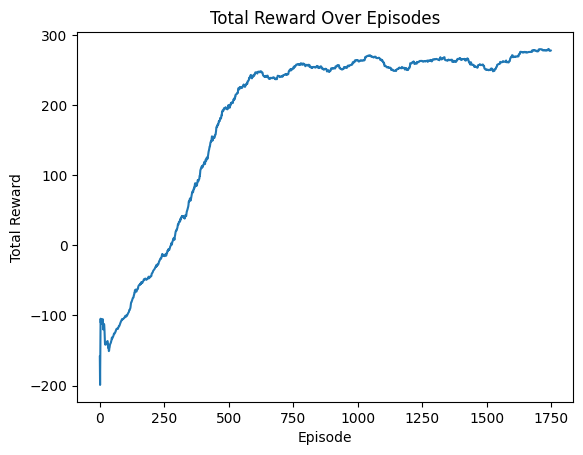

Episode 1: Total Reward: 247.1576767803747
Episode 2: Total Reward: 316.02640845851016
Episode 3: Total Reward: 287.3014451708591
Episode 4: Total Reward: 245.2121197754534
Episode 5: Total Reward: 294.34234505425115


In [13]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import csv

model_dir = 'model'
os.makedirs(model_dir, exist_ok=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
RANDOM_SEED = 42

random.seed(RANDOM_SEED)

np.random.seed(RANDOM_SEED)

torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)


class SumTree:
    def __init__(self, capacity):
        self.capacity = capacity
        self.tree = np.zeros(2 * capacity - 1)
        self.data = np.zeros(capacity, dtype=object)
        self.data_pointer = 0

    def add(self, priority, data):
        tree_index = self.data_pointer + self.capacity - 1
        self.data[self.data_pointer] = data
        self.update(tree_index, priority)
        self.data_pointer += 1
        if self.data_pointer >= self.capacity:
            self.data_pointer = 0

    def update(self, tree_index, priority):
        change = priority - self.tree[tree_index]
        self.tree[tree_index] = priority
        while tree_index != 0:
            tree_index = (tree_index - 1) // 2
            self.tree[tree_index] += change

    def get_leaf(self, value):
        parent_index = 0
        while True:
            left_child_index = 2 * parent_index + 1
            right_child_index = left_child_index + 1
            if left_child_index >= len(self.tree):
                leaf_index = parent_index
                break
            else:
                if value <= self.tree[left_child_index]:
                    parent_index = left_child_index
                else:
                    value -= self.tree[left_child_index]
                    parent_index = right_child_index
        data_index = leaf_index - self.capacity + 1
        return leaf_index, self.tree[leaf_index], self.data[data_index]

class PrioritizedReplayBuffer:
    def __init__(self, capacity, alpha=0.8):
        self.alpha = alpha
        self.capacity = capacity
        self.tree = SumTree(capacity)
        self.max_priority = 1.0

    def push(self, state, action, reward, next_state, done):
        state = np.expand_dims(state, 0)  # Ensure state is correctly shaped as (1, num_features)
        next_state = np.expand_dims(next_state, 0)  # Same for next_state
        max_priority = np.max(self.tree.tree[-self.tree.capacity:])
        if max_priority == 0:
            max_priority = self.max_priority
        self.tree.add(max_priority, (state, action, reward, next_state, done))

    def sample(self, batch_size, beta):
        batch = []
        indices = np.empty(batch_size, dtype=int)
        priorities = np.empty(batch_size, dtype=float)
        segment = self.tree.tree[0] / batch_size
        priorities_sum = self.tree.tree[0]
        for i in range(batch_size):
            a = segment * i
            b = segment * (i + 1)
            value = np.random.uniform(a, b)
            index, priority, data = self.tree.get_leaf(value)
            batch.append(data)
            indices[i] = index
            priorities[i] = priority
        sample_probs = priorities / priorities_sum
        weights = (self.capacity * sample_probs) ** (-beta)
        weights /= weights.max()
        states, actions, rewards, next_states, dones = zip(*batch)
        return np.concatenate(states), np.array(actions), np.array(rewards), np.concatenate(next_states), np.array(dones), indices, weights

    def update_priorities(self, indices, errors, offset=0.1):
        for idx, error in zip(indices, errors):
            priority = (abs(error) + offset) ** self.alpha
            self.tree.update(idx, priority)

    def __len__(self):
        return len(self.tree.data)


class DuelingDDQN(nn.Module):
    def __init__(self, num_inputs, num_actions):
        super(DuelingDDQN, self).__init__()
        self.feature = nn.Sequential(
            nn.Linear(num_inputs, 256),
            nn.ReLU(),
        )

        self.value_stream = nn.Sequential(
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 1)
        )

        self.advantage_stream = nn.Sequential(
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, num_actions)
        )

    def forward(self, x):
        features = self.feature(x)
        value = self.value_stream(features)
        advantages = self.advantage_stream(features)


        q_values = value + (advantages - advantages.mean(dim=1, keepdim=True))
        return q_values

def choose_action(state, epsilon, num_actions):
    if random.random() < epsilon:
        return random.randrange(num_actions)
    else:
        with torch.no_grad():
            state = torch.FloatTensor(np.expand_dims(state, axis=0)).to(device)
            q_values = model(state)
            return q_values.max(1)[1].item()

def compute_loss(batch_size, beta=0.5):
    state, action, reward, next_state, done, indices, weights = replay_buffer.sample(batch_size, beta=beta)

    state = torch.FloatTensor(state).to(device)
    next_state = torch.FloatTensor(next_state).to(device)
    action = torch.LongTensor(action).unsqueeze(-1).to(device)
    reward = torch.FloatTensor(reward).to(device)
    done = torch.FloatTensor(done).to(device)
    weights = torch.FloatTensor(weights).to(device)

    q_value = model(state).gather(1, action).squeeze(-1)


    best_action = model(next_state).max(1)[1].unsqueeze(1)
    next_q_state_values = target_model(next_state).gather(1, best_action).squeeze(1).detach()

    expected_q_value = reward + gamma * next_q_state_values * (1 - done)


    loss = nn.functional.smooth_l1_loss(q_value, expected_q_value, reduction='none')
    loss = (loss * weights).mean()


    prios = loss.detach().item() + 1e-5
    prios = np.full(len(indices), prios)
    replay_buffer.update_priorities(indices, prios)
    return loss

def simulate_agent(env, model, n_episodes = 5):

    for i in range(n_episodes):
        state = env.reset()
        episode_reward = 0

        while True:
            if random.random() < 0:
                action = random.randrange(n_actions)
            else:
                with torch.no_grad():
                    state_tensor = torch.FloatTensor(np.expand_dims(state, axis=0)).to(device)
                    action = model(state_tensor).argmax().item()
            state, reward, done, _ = env.step(action)
            state = np.array([state]) if not isinstance(state, np.ndarray) else state
            episode_reward += reward

            if done:
                break

        print(f"Episode {i+1}: Total Reward: {episode_reward}")

def plot_rewards(episode_rewards):
    plt.plot(episode_rewards)
    plt.title('Total Reward Over Episodes')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.show()

batch_size = 128
gamma = 0.99
replay_buffer_size = 200000
learning_rate = 0.0001
num_episodes = 1750
target_update = 4

epsilon_start = 1.0
epsilon_final = 0.01
epsilon_decay = 200000

eps_diff = epsilon_start - epsilon_final
epsilon_by_frame = lambda frame_idx: epsilon_final + eps_diff * np.exp(-1. * frame_idx / epsilon_decay)

env = gym.make('LunarLander-v2')
env.seed(RANDOM_SEED)

n_inputs = env.observation_space.shape[0]
n_actions = env.action_space.n

model = DuelingDDQN(n_inputs, n_actions).to(device)
target_model = DuelingDDQN(n_inputs, n_actions).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

replay_buffer = PrioritizedReplayBuffer(replay_buffer_size)
target_model.load_state_dict(model.state_dict())

episode_rewards = []
avg_rewards = []
start_time = time.time()
rolling_window = 100
threshold_reached = False

for i in range(num_episodes):

    state = env.reset()
    episode_reward = 0

    for step in range(1000):

        epsilon = epsilon_by_frame(i * 1000 + step)
        action = choose_action(state, epsilon, n_actions)

        next_state, reward, done, _ = env.step(action)

        if isinstance(next_state, np.ndarray):
          next_state = next_state
        else:
          next_state = np.array([next_state])

        replay_buffer.push(state, action, reward, next_state, done)

        state = next_state
        episode_reward += reward

        if len(replay_buffer) > batch_size:

            loss = compute_loss(batch_size)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if done:
            break

    episode_rewards.append(episode_reward)

    if i >= rolling_window:
        sum_reward = sum(episode_rewards[i - rolling_window : i])
        avg_reward = sum_reward / rolling_window
    else:
        sum_reward = sum(episode_rewards[:i + 1])
        avg_reward = sum_reward / (i + 1)

    avg_rewards.append(avg_reward)

    if avg_reward >= 200 and threshold_reached is False:
        threshold_reached = True
        print("200 avg. reward reached at episode {} in {:.2f} sec".format(i, time.time() - start_time))

    if i % target_update == 0:
        target_model.load_state_dict(model.state_dict())

    current_lr = optimizer.param_groups[0]['lr']

    print('Episode: {}, Total reward: {}, Epsilon: {:.2f}, Learning_rate: {}'.format(i, episode_reward, epsilon, current_lr))

plot_rewards(avg_rewards)

env = gym.make('LunarLander-v2', render_mode="human")
simulate_agent(env, model)
env.close()